• Consider a digital option with a payoff at maturity T = 1

1L<ST <U
where L= 80 and U = 120 are the lower and upper barriers.

• Explain how to replicate the digital option using European options.

• Draw the Black Scholes delta profile of the digital option. Assume the

implied vol is 0.2, risk free rate and dividend yield are 0.

• Draw the Black Scholes vega profile of the digital option.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
L = 80          # Lower barrier
U = 120         # Upper barrier
sigma = 0.2     # Implied volatility
r = 0           # Risk-free rate
q = 0           # Dividend yield
T = 1           # Time to maturity

ls_S = np.linspace(0,250, 500)

- Long a call spread around 80
	- buy half call option at 79
	- sell half call option at 81
- Short a call spread around 120
	- sell half call option at 119
	- buy half call option at 121

# Draw BS Delta profile

In [65]:
# for call option, we make a function for delta
def combined_call_delta(S):
    """
    MAKE SURE TO CHANGE ls_K AND ls_pos BASED ON DIGITAL SCENARIO
    """
    ls_K = [79, 81, 119, 121]
    ls_pos = [.5, -.5, -.5, .5]
    total_delta = 0

    for K, pos in zip(ls_K, ls_pos):
        total_delta += pos * call_delta(d1(S, K, sigma, r, q, T), q, T)

    return total_delta

def call_delta(d1, q, T):
    return np.exp(-q*T) * norm.cdf(d1)

def d1(S, K, sigma, r, q, T):
    return (np.log(S / K) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


/var/folders/h2/r7qn2m9n1zb6y_0q191gdqth0000gn/T/ipykernel_19081/3773527882.py:19: RuntimeWarning: divide by zero encountered in log
  return (np.log(S / K) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


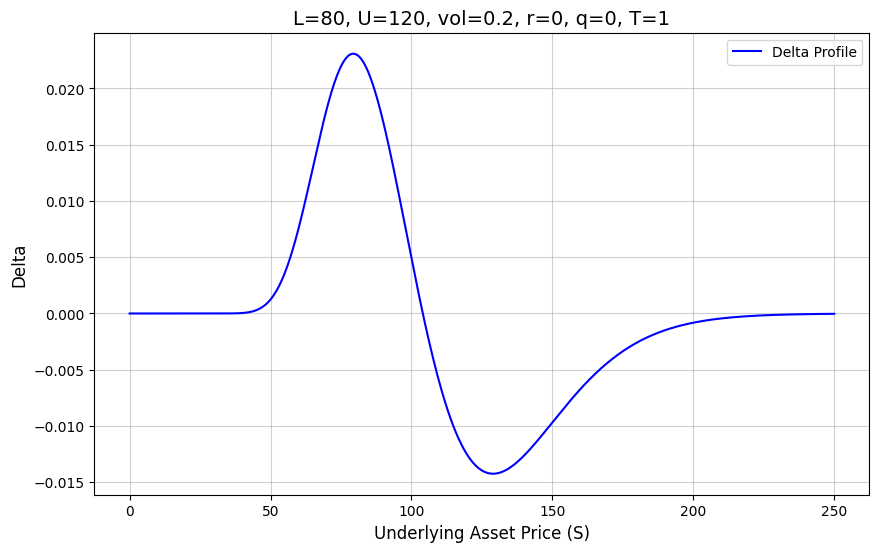

In [66]:
portfolio_delta = []
for S in ls_S:
    portfolio_delta.append(combined_call_delta(S))
    
plt.figure(figsize=(10, 6))
plt.plot(ls_S, portfolio_delta, label="Delta Profile", color="blue")
plt.title(f"L={L}, U={U}, vol={sigma}, r={r}, q={q}, T={T}", fontsize=14)
plt.xlabel("Underlying Asset Price (S)", fontsize=12)
plt.ylabel("Delta", fontsize=12)
plt.legend()
plt.grid(alpha=0.6)
plt.show()

# Draw BS Vega profile

In [67]:
# for call option, we make a function for delta
def combined_call_vega(S):
    """
    MAKE SURE TO CHANGE ls_K AND ls_pos BASED ON DIGITAL SCENARIO
    """
    ls_K = [79, 81, 119, 121]
    ls_pos = [.5, -.5, -.5, .5]
    total_vega = 0

    for K, pos in zip(ls_K, ls_pos):
        total_vega += pos * call_vega(d1(S, K, sigma, r, q, T), q, T, S)

    return total_vega

def call_vega(d1, q, T, S):
    return np.exp(-q*T) * S * T ** .5 * norm.pdf(d1)


In [68]:
combined_call_vega(100)

-2.517596427895585

/var/folders/h2/r7qn2m9n1zb6y_0q191gdqth0000gn/T/ipykernel_19081/3773527882.py:19: RuntimeWarning: divide by zero encountered in log
  return (np.log(S / K) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


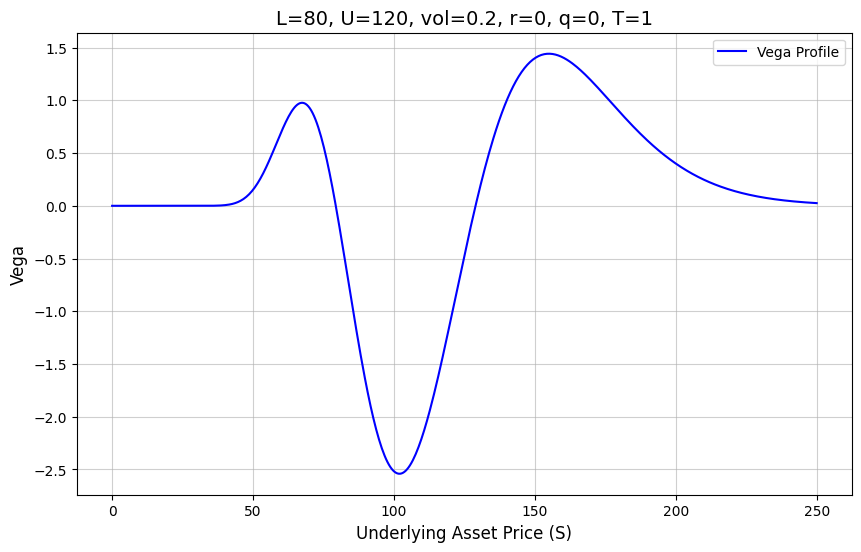

In [69]:
portfolio_vega = []
for S in ls_S:
    portfolio_vega.append(combined_call_vega(S))
plt.figure(figsize=(10, 6))
plt.plot(ls_S, portfolio_vega, label="Vega Profile", color="blue")
plt.title(f"L={L}, U={U}, vol={sigma}, r={r}, q={q}, T={T}", fontsize=14)
plt.xlabel("Underlying Asset Price (S)", fontsize=12)
plt.ylabel("Vega", fontsize=12)
plt.legend()
plt.grid(alpha=0.6)
plt.show()